# Tutorial

Quick tutorial on how to use the COVID-19 Knowledge Graph.

In [1]:
# If you don't have it installed already, install the ebel_rest package
# !pip install ebel_rest

In [2]:
import os
import sys
import time

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from ebel_rest import connect, query, statistics

In [3]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
matplotlib.style.use('seaborn')

### Notebook Provenance


In [4]:
sys.version

'3.7.6 (default, Jan 30 2020, 09:44:41) \n[GCC 9.2.1 20190827 (Red Hat 9.2.1-1)]'

In [5]:
time.asctime()

'Mon Apr 27 09:27:01 2020'

## Set Graphstore Configuration and Connect

In [6]:
server = "http://graphstore.scai.fraunhofer.de"
password = 'covid'
user = 'covid_user'
db_name = "covid"
print_url = True

# Connect to database
connect(user, password, server, db_name, print_url)

### Content Summary

A summary of the types of nodes and edges present in the COVID-19 Knowledge Graph.

In [7]:
statistics.summarize().table

http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_summarize/


,label,count
0,Total Nodes,4385
1,Total Edges,7742
2,Total BEL Nodes,4209
3,Total BEL Edges,4930
4,Total Publications,153


### Explore provenance information
The pubmid identifiers for the articles selected for the contruction of the COVID-19 Knowledge Graph.

**Note that there are numerous preprints that will not be taken into account since we only consider papers indexed in PubMed for this analysis.**

In [8]:
pubmed_identifiers = query.list_pmids()

http://graphstore.scai.fraunhofer.de/function/covid/all_pmids/


In [9]:
pubmed_identifiers

[30301856,
 31987001,
 15916886,
 32129518,
 16014971,
 30310104,
 32109013,
 32113704,
 30761102,
 15194747,
 19906920,
 24987391,
 25135833,
 32130973,
 32125140,
 19398035,
 22936401,
 32142651,
 31986264,
 32104915,
 19079579,
 32186952,
 32203186,
 32165541,
 32171076,
 32169119,
 32171740,
 32188753,
 32170560,
 32186711,
 32215613,
 32213337,
 32178593,
 32198713,
 32196678,
 32188729,
 32205856,
 32216698,
 0,
 32227090,
 32220710,
 32221983,
 20020050,
 17397959,
 32142773,
 32171193,
 32179150,
 32220633,
 15294014,
 28659436,
 32169481,
 32231345,
 16894145,
 31233808,
 32224164,
 32125455,
 32198291,
 32215589,
 32189136,
 19394665,
 16043521,
 32201080,
 32246845,
 29217279,
 32173241,
 32094589,
 22253445,
 32142938,
 32203189,
 32155444,
 32172669,
 32227916,
 32132669,
 32190290,
 32194980,
 32147628,
 15878679,
 32173287,
 32178711,
 32220278,
 32222466,
 21356245,
 32167166,
 32221306,
 32113509,
 32166483,
 32193831,
 32173110,
 32218301,
 32232214,
 30463975,
 32081

### Summary of Nodes and Edges in the Knowledge Graph

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_nodes/
http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_edges/
http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_bel_nodes/
http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_stmts/


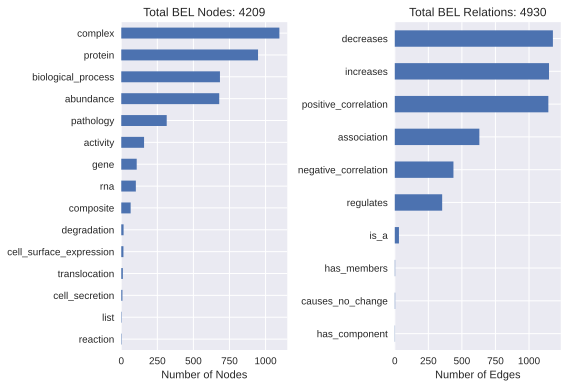

In [10]:
fig, axes = plt.subplots(1, 2)
lax = axes[0]
rax = axes[1]

ntc = statistics.nodes().table.set_index('node_class').sort_values(by='number_of_nodes', axis=0, ascending=True)
etc = statistics.edges().table.set_index('edge_class').sort_values(by='number_of_edges', axis=0, ascending=True)

ntc.plot(kind='barh', ax=lax, legend=None)
lax.set_xlabel("Number of Nodes")
lax.set_ylabel("")
lax.set_title('Total BEL Nodes: {}'.format(statistics.total_bel_nodes().data[0]['number_of_bel_nodes']))

etc.plot(kind='barh', ax=rax, legend=None)
rax.set_xlabel("Number of Edges")
rax.set_ylabel("")
rax.set_title('Total BEL Relations: {}'.format(statistics.total_bel_edges().data[0]['number_of_stmts']))

plt.tight_layout()

# Export
# plt.savefig("nodes_edges_summary.svg")

### Summary of Namespaces Used

http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_namespace_count/


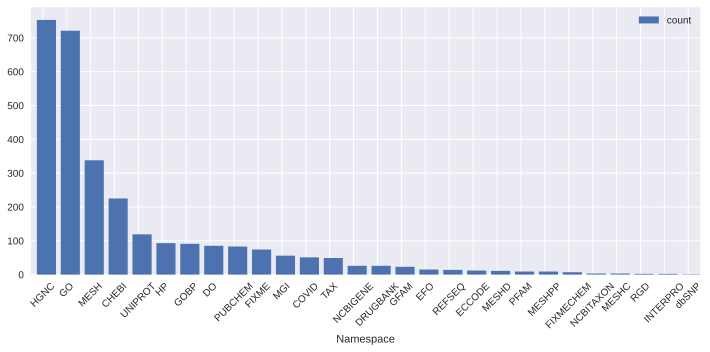

In [11]:
nsp = statistics.namespace_by_count().table.set_index('namespace').plot.bar(figsize=(10,5), rot=45)
nsp.set_xlabel("Namespace")

for container in nsp.containers:
    plt.setp(container, width=0.8)
    
plt.tight_layout()

# # Export
plt.savefig("namespace_summary.svg")